In [14]:
# import nwhy
import hypernetx as hnx
import networkx as nx
from networkx import Graph
import os
import numpy as np
import csv
import pickle
import json
from scipy import sparse
from fast_pagerank import pagerank
from fast_pagerank import pagerank_power
from matplotlib import pyplot as plt

In [41]:
def plotGraph(G,s):
    edges = len(G.edges())
    nodes = len(G.nodes())
    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(G, k=0.8)
    nx.draw(G, pos , with_labels = False, width=0.02, node_color='lightblue', node_size=5)
    plt.title(f's = {s}, nodes ={nodes}, edges ={edges}')

In [2]:
def loadDictionary(filename):
    files = os.listdir()
    if filename in files:
        with open(filename, "rb") as f:
            dictionary  = pickle.load(f)
            print(f'loaded dictionary from {filename}..| length: {len(dictionary)}')
            return dictionary
    else:
        print("no such file")
        
        

In [4]:
def saveDictionary(dictionary,filename):
    files = os.listdir()
    if not filename in files:
        with open(filename, 'wb') as f:
            print(f'dumping dictionary in {filename}....')
            pickle.dump(dictionary, f)
    else:
        print("file already exists..pls remove it and run again.")
    

In [11]:
articles = loadDictionary("articles.pickle")
comments = loadDictionary("comments.pickle")
users = loadDictionary("users.pickle")
articles_to_commenters = loadDictionary("articles_to_commenters.pickle")
id_to_node_articles_comments = loadDictionary("id_to_node_articles_comments.pickle")
locations_to_users = loadDictionary("locations_to_users.pickle")
id_to_node_locations = loadDictionary("id_to_node_locations.pickle")

loaded dictionary from articles.pickle..| length: 3445
loaded dictionary from comments.pickle..| length: 640904
loaded dictionary from users.pickle..| length: 113089
loaded dictionary from articles_to_commenters.pickle..| length: 3445
loaded dictionary from id_to_node_articles_comments.pickle..| length: 3445
loaded dictionary from locations_to_users.pickle..| length: 10827
loaded dictionary from id_to_node_locations.pickle..| length: 10827


In [2]:
path = r'./archive'

In [2]:
print(os.listdir(path))

NameError: name 'path' is not defined

In [ ]:
paths_articles = []
paths_comments = []

articles_file_path_jan = path + '/' +'ArticlesJan2018.csv'
paths_articles.append(articles_file_path_jan)
comments_file_path_jan = path + '/' + 'CommentsJan2018.csv'
paths_comments.append(comments_file_path_jan)

articles_file_path_feb = path + '/' +'ArticlesFeb2018.csv'
paths_articles.append(articles_file_path_feb)
comments_file_path_feb = path + '/' + 'CommentsFeb2018.csv'
paths_comments.append(comments_file_path_feb)


articles_file_path_march = path + '/' +'ArticlesMarch2018.csv'
paths_articles.append(articles_file_path_march)
comments_file_path_march = path + '/' + 'CommentsMarch2018.csv'
paths_comments.append(comments_file_path_march)

articles_file_path_april = path + '/' +'ArticlesApril2018.csv'
# paths_articles.append(articles_file_path_april)
comments_file_path_april = path + '/' + 'CommentsApril2018.csv'
# paths_comments.append(comments_file_path_april)

print(paths_articles)
print(paths_comments)

In [5]:
def findMax(dictionary):
    mx = 0
    max_key = -1
    for key in dictionary:
        if dictionary[key] > mx:
            mx = dictionary[key] 
            max_key = key
    return (max_key,mx)

In [6]:
def findMin(dictionary):
    mn = 1
    min_key = -1
    for key in dictionary:
        if dictionary[key] < mn:
            mn = dictionary[key] 
            min_key = key
    return (min_key,mn)

In [7]:
def saveGraphAsDict(G, filename):
    dictionary = nx.to_dict_of_dicts(G)
    files = os.listdir()
    if not filename in files:
        with open(filename, 'wb') as f:
            print(f'dumping articles into {filename}...')
            pickle.dump(dictionary, f)
    else:
        print("file already exists")

In [8]:
def getGraphFromDict(filename):
    files = os.listdir()
    if filename in files:
        with open(filename, "rb") as f:
            dictionary = pickle.load(f)
            print(f'loaded dictionary from {filename}, length is {len(dictionary)}')
            G = from_dict_of_dicts(dictionary)
            return G
    else:
        print("no such file")
        return None

In [9]:
def createDictionary(array_of_dictionaries):
    dictionary = array_of_dictionaries[0]
    for i in range(1, len(array_of_dictionaries)):
        dictionary.update(array_of_dictionaries[i])
    return dictionary
        

In [7]:
articles  = {}
count = 0
for articles_file_path in paths_articles:

    with open(articles_file_path, "r",encoding="utf-8",newline="") as f:
        csv_reader = csv.reader(f, delimiter=",")
        header = next(csv_reader)
        record = [{field:None} for field in header]
        index = 0
        for i,item in enumerate(record):
            if(list(item.keys())[0]) == "articleID":
                index =i
        for row in csv_reader:
            record = [{field:None} for field in header]
            for i, item in enumerate(row):
                record[i][list(record[i].keys())[0]] = item
            articles[row[index]]= createDictionary(record)
            count += 1
print(count)
print(len(articles))

NameError: name 'paths_articles' is not defined

In [41]:
saveDictionary(articles,"articles.pickle")

file already exists..pls remove it and run again.


In [ ]:
count = 0
for ID in articles:
    print(ID)
    print(articles[ID])
    count +=1
    if count==5:
        break
    

In [ ]:
comments = {}
num = 0
for comments_file_path in paths_comments:
    with open(comments_file_path, "r",encoding="utf-8",newline="") as f:
        csv_reader = csv.reader(f, delimiter=",")
        header = next(csv_reader)
        record = [{field:None} for field in header]
        index = 4
        for i,item in enumerate(record):
            if(list(item.keys())[0]) == "commentID":
                index =i
        for row in csv_reader:
            num+=1
            record = [{field:None} for field in header]
            for i, item in enumerate(row):
                record[i][list(record[i].keys())[0]] = item
            dictionary = createDictionary(record)
            if dictionary["articleID"] in articles.keys():
                comments[str(row[index])] = dictionary
            
print(num)
print(f'total comments: {len(comments)}')

In [47]:
saveDictionary(comments,"comments.pickle")

file already exists..pls remove it and run again.


In [ ]:
count = 0
for ID in comments:
    print(ID)
    print(comments[ID])
    count +=1
    if count==5:
        break

In [ ]:
for commentID in comments:
    articleID = comments[commentID]["articleID"] 
    if not "num_comments" in articles[articleID]:
        articles[articleID]["num_comments"] = 1
    else:
        articles[articleID]["num_comments"] += 1

In [ ]:
count = 0
for ID in articles:
    print(articles[ID])
    count +=1
    if count==5:
        break

In [ ]:
total_comments = 0
article_with_most_comments = {}
maxnum = 0
for articleID in articles:
    total_comments += articles[articleID]["num_comments"]
    if articles[articleID]["num_comments"] > maxnum:
        maxnum = articles[articleID]["num_comments"]
        article_with_most_comments = articles[articleID]
print(total_comments)
print(article_with_most_comments)
print(maxnum)

In [ ]:
articles_to_commenters = {articles[ID]["articleID"]:set({}) for ID in articles}
users = {}
for ID in comments:
    articleID = comments[ID]["articleID"]
    userID = comments[ID]["userID"]
    userTitle  = "unknown"
    userLocation = "unknown"
    if "userTitle" in comments[ID].keys():
        userTitle = comments[ID]["userTitle"]
    if "userLocation" in comments[ID].keys():
        userLocation = comments[ID]["userLocation"]
        
    users[userID] = {"userTitle":userTitle, "location":userLocation}    
    articles_to_commenters[articleID].add(userID)
    

    
print(f'{len(users)} users found')

for i, ID in enumerate(users):
    print(ID)
    print(users[ID])
    if i==5:
        break

for i, ID in enumerate(articles_to_commenters):
    print(ID)
    print(articles_to_commenters[ID])
    if i==5:
        break

In [48]:
saveDictionary(users,"users.pickle")

file already exists..pls remove it and run again.


In [49]:
saveDictionary(articles_to_commenters,"articles_to_commenters.pickle")

file already exists..pls remove it and run again.


In [ ]:
a = hnx.Entity('a',{1,2})
b = hnx.Entity('b',{2,3})
c = hnx.Entity('c',{1,3})
E = hnx.EntitySet('sample',elements=[a,b,c])
H =hnx.Hypergraph(E, static = True)
hnx.Hypergraph(E)

In [ ]:
hnx.Hypergraph(E).edges

In [ ]:
hnx.drawing.rubber_band.draw(H)

In [ ]:
linegraph = H.get_linegraph(1, edges=True, use_nwhy=True)
nx.draw(linegraph,with_labels = True)

In [12]:
entities = []
for articleID in articles_to_commenters:
    entities.append(hnx.Entity(articleID,articles_to_commenters[articleID]))
    
E = hnx.EntitySet('articles_commenters',elements=entities)
H = hnx.Hypergraph(E,static=True)

In [60]:
edges = hnx.Hypergraph(E).edges

id_to_node_articles_comments = {}
for i, thing in enumerate(edges):
    id_to_node_articles_comments[i] = thing

In [ ]:
saveDictionary(id_to_node_articles_comments,"id_to_node_articles_comments.pickle")

In [13]:
linegraph_articles_s1 = H.get_linegraph(1, edges=True, use_nwhy=True)

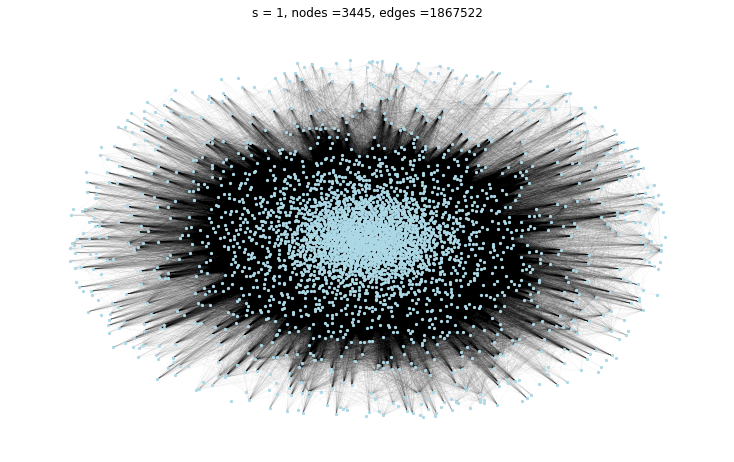

In [44]:
plotGraph(linegraph_articles_s1,1)

In [37]:
linegraph_articles_s10 = H.get_linegraph(10, edges=True, use_nwhy=True)

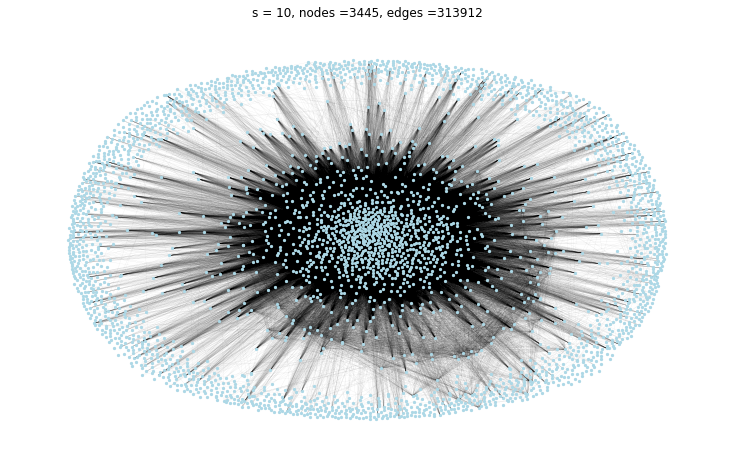

In [43]:
plotGraph(linegraph_articles_s10,10)

In [39]:
linegraph_articles_s20 = H.get_linegraph(20, edges=True, use_nwhy=True)

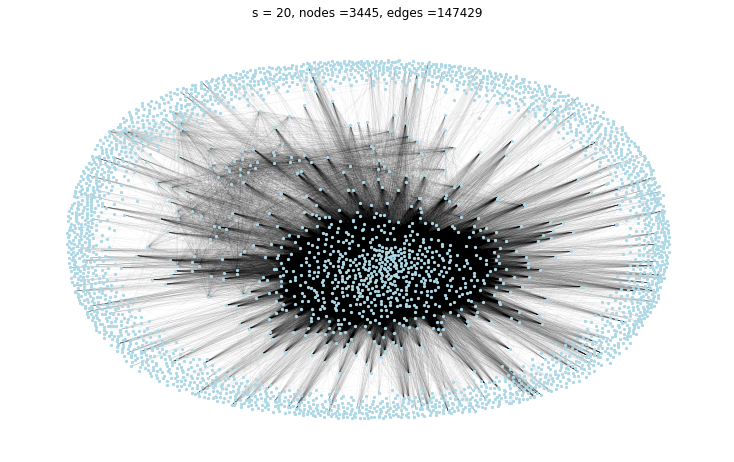

In [45]:
plotGraph(linegraph_articles_s20,20)

In [19]:
linegraph_articles_s100 = H.get_linegraph(100, edges=True, use_nwhy=True)

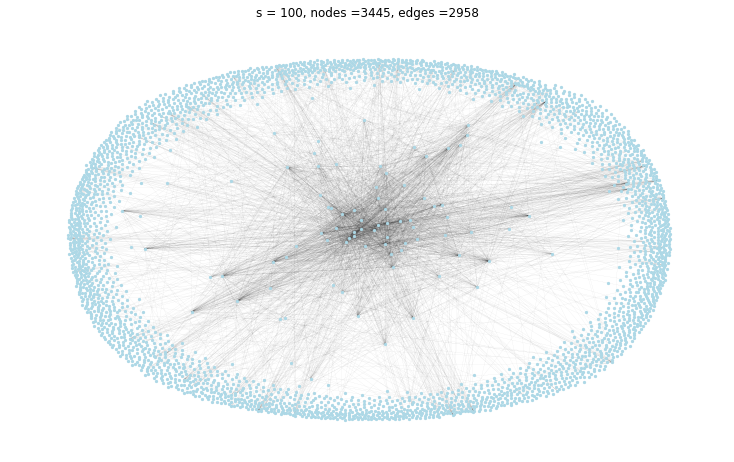

In [46]:
plotGraph(linegraph_articles_s100,100)

In [103]:
pagerank_articles_s1 = nx.pagerank_numpy(linegraph_articles_s1)
high = findMax(pagerank_articles_s1)[0]
articles[id_to_node_articles_comments[high]]

/tmp/ipykernel_560/3800406599.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_articles_s1 = nx.pagerank_numpy(linegraph_articles_s1)


{'articleID': '5ab3fc5e47de81a901215795',
 'byline': 'By FRANK BRUNI',
 'documentType': 'article',
 'headline': 'Cynthia Nixon and the Age of Inexperience',
 'keywords': "['United States Politics and Government', 'Celebrities', 'Nixon, Cynthia', 'New York State', 'Elections, Governors']",
 'multimedia': '1',
 'newDesk': 'OpEd',
 'printPage': '3',
 'pubDate': '2018-03-22 18:56:25',
 'sectionName': 'Sunday Review',
 'snippet': 'In politics, too, training and knowledge matter. Hasn’t Trump taught us that?',
 'source': 'The New York Times',
 'typeOfMaterial': 'Op-Ed',
 'webURL': 'https://www.nytimes.com/2018/03/22/opinion/cynthia-nixon-experience-governor-ny.html',
 'articleWordCount': '1150',
 'num_comments': 1354}

In [173]:
def getFastPageRank(G):
    n = len(G.nodes())
    e = list(G.edges())
    e = [list(tp) for tp in e]
    print(f'total nodes: {n} | total edges: {len(e)}')
    A = np.array(e)
    weights = [1 for i in range (0,len(e))]
    G = sparse.csr_matrix((weights, (A[:,0], A[:,1])), shape=(n, n))
#     pr=pagerank(G, p=0.85)
    pr = pagerank_power(G, p=0.85, tol=1e-6)
    print(f'max page rank: {max(pr)}')
    print(f'node: {np.argmax(pr)}')
    return np.argmax(pr)

In [174]:
high = getFastPageRank(linegraph_articles_s1)
articles[id_to_node_articles_comments[high]]

total nodes: 3445 | total edges: 1867522
max page rank: 0.05874347027012955
node: 3444


{'articleID': '5ac1802d47de81a90121ae45',
 'byline': 'By CHARLES M. BLOW',
 'documentType': 'article',
 'headline': 'Rhythms  Of Tragedy',
 'keywords': "['Search and Seizure', 'Race and Ethnicity', 'Blacks', 'Murders, Attempted Murders and Homicides', 'Clark, Stephon (1995-2018)', 'Sacramento (Calif)']",
 'multimedia': '1',
 'newDesk': 'OpEd',
 'printPage': '23',
 'pubDate': '2018-04-02 00:58:19',
 'sectionName': 'Unknown',
 'snippet': 'These shootings keep happening because, on some level, America finds them acceptable.',
 'source': 'The New York Times',
 'typeOfMaterial': 'Op-Ed',
 'webURL': 'https://www.nytimes.com/2018/04/01/opinion/stephon-clark-tragedy.html',
 'articleWordCount': '837',
 'num_comments': 56}

In [175]:
high = getFastPageRank(linegraph_articles_s10)
articles[id_to_node_articles_comments[high]]

total nodes: 3445 | total edges: 313912
max page rank: 0.0325200583165581
node: 3433


{'articleID': '5abfd3ae47de81a90121a8bf',
 'byline': 'By CLAY RISEN',
 'documentType': 'article',
 'headline': 'Spiro Agnew, Father Of Today’s G.O.P.',
 'keywords': "['Blacks', 'Discrimination', 'Republican Party', 'United States Politics and Government', 'Agnew, Spiro T', 'Civil Rights Movement (1954-68)']",
 'multimedia': '1',
 'newDesk': 'OpEd',
 'printPage': '4',
 'pubDate': '2018-03-31 18:30:04',
 'sectionName': 'Sunday Review',
 'snippet': 'In 1968, Spiro Agnew was the man of the white, suburban moment.',
 'source': 'The New York Times',
 'typeOfMaterial': 'Op-Ed',
 'webURL': 'https://www.nytimes.com/2018/03/31/opinion/sunday/spiro-agnew-mlk.html',
 'articleWordCount': '1218',
 'num_comments': 202}

In [176]:
high = getFastPageRank(linegraph_articles_s20)
articles[id_to_node_articles_comments[high]]

total nodes: 3445 | total edges: 147429
max page rank: 0.024989778636837223
node: 3433


{'articleID': '5abfd3ae47de81a90121a8bf',
 'byline': 'By CLAY RISEN',
 'documentType': 'article',
 'headline': 'Spiro Agnew, Father Of Today’s G.O.P.',
 'keywords': "['Blacks', 'Discrimination', 'Republican Party', 'United States Politics and Government', 'Agnew, Spiro T', 'Civil Rights Movement (1954-68)']",
 'multimedia': '1',
 'newDesk': 'OpEd',
 'printPage': '4',
 'pubDate': '2018-03-31 18:30:04',
 'sectionName': 'Sunday Review',
 'snippet': 'In 1968, Spiro Agnew was the man of the white, suburban moment.',
 'source': 'The New York Times',
 'typeOfMaterial': 'Op-Ed',
 'webURL': 'https://www.nytimes.com/2018/03/31/opinion/sunday/spiro-agnew-mlk.html',
 'articleWordCount': '1218',
 'num_comments': 202}

In [177]:
high = getFastPageRank(linegraph_articles_s100)
articles[id_to_node_articles_comments[high]]

total nodes: 3445 | total edges: 2958
max page rank: 0.015121421592393127
node: 3220


{'articleID': '5aba12a547de81a901217c97',
 'byline': 'By JOHN PAUL STEVENS',
 'documentType': 'article',
 'headline': 'Repeal the Second Amendment',
 'keywords': "['Gun Control', 'Second Amendment (US Constitution)', 'Law and Legislation', 'Supreme Court (US)']",
 'multimedia': '1',
 'newDesk': 'OpEd',
 'printPage': '23',
 'pubDate': '2018-03-27 09:45:06',
 'sectionName': 'Unknown',
 'snippet': 'This weekend’s marches make it clear: To enact real gun control, we need to change the Constitution.',
 'source': 'The New York Times',
 'typeOfMaterial': 'Op-Ed',
 'webURL': 'https://www.nytimes.com/2018/03/27/opinion/john-paul-stevens-repeal-second-amendment.html',
 'articleWordCount': '539',
 'num_comments': 2927}

In [171]:
pagerank_articles_s10 = nx.pagerank_numpy(linegraph_articles_s10)
high = findMax(pagerank_articles_s10)[0]
articles[id_to_node_articles_comments[high]]

/tmp/ipykernel_560/368663217.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_articles_s10 = nx.pagerank_numpy(linegraph_articles_s10)


{'articleID': '5a8fe63410f40f00018c2971',
 'byline': 'By NATALIE PROULX',
 'documentType': 'article',
 'headline': 'Should Teachers Be Armed With Guns?',
 'keywords': '[]',
 'multimedia': '66',
 'newDesk': 'Learning',
 'printPage': '0',
 'pubDate': '2018-02-23 10:00:01',
 'sectionName': 'Unknown',
 'snippet': 'How would you feel if you knew some adults in your school were carrying concealed weapons?',
 'source': 'The New York Times',
 'typeOfMaterial': 'News',
 'webURL': 'https://www.nytimes.com/2018/02/23/learning/should-teachers-be-armed-with-guns.html',
 'articleWordCount': '670',
 'num_comments': 447}

In [106]:
pagerank_articles_s20 = nx.pagerank_numpy(linegraph_articles_s20)
high = findMax(pagerank_articles_s20)[0]
articles[id_to_node_articles_comments[high]]

/tmp/ipykernel_560/4214985076.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_articles_s20 = nx.pagerank_numpy(linegraph_articles_s20)


{'articleID': '5aba12a547de81a901217c97',
 'byline': 'By JOHN PAUL STEVENS',
 'documentType': 'article',
 'headline': 'Repeal the Second Amendment',
 'keywords': "['Gun Control', 'Second Amendment (US Constitution)', 'Law and Legislation', 'Supreme Court (US)']",
 'multimedia': '1',
 'newDesk': 'OpEd',
 'printPage': '23',
 'pubDate': '2018-03-27 09:45:06',
 'sectionName': 'Unknown',
 'snippet': 'This weekend’s marches make it clear: To enact real gun control, we need to change the Constitution.',
 'source': 'The New York Times',
 'typeOfMaterial': 'Op-Ed',
 'webURL': 'https://www.nytimes.com/2018/03/27/opinion/john-paul-stevens-repeal-second-amendment.html',
 'articleWordCount': '539',
 'num_comments': 2927}

In [151]:
pagerank_articles_s100 = nx.pagerank_numpy(linegraph_articles_s100)
high = findMax(pagerank_articles_s100)[0]
articles[id_to_node_articles_comments[high]]

/tmp/ipykernel_560/3632955293.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_articles_s100 = nx.pagerank_numpy(linegraph_articles_s100)


{'articleID': '5aa7c9c147de81a90120e141',
 'byline': 'By PETER BAKER, GARDINER HARRIS and MARK LANDLER',
 'documentType': 'article',
 'headline': 'Unknown',
 'keywords': "['Tillerson, Rex W', 'Trump, Donald J', 'United States International Relations', 'State Department', 'Appointments and Executive Changes', 'Washington (DC)', 'United States Politics and Government', 'United States']",
 'multimedia': '1',
 'newDesk': 'Washington',
 'printPage': '0',
 'pubDate': '2018-03-13 12:53:17',
 'sectionName': 'Politics',
 'snippet': 'Rex W. Tillerson, a former chief executive of Exxon Mobil, had been among President Trump’s most well-regarded cabinet choices. He is replaced by Mike Pompeo, currently the C.I.A. director.',
 'source': 'The New York Times',
 'typeOfMaterial': 'News',
 'webURL': 'https://www.nytimes.com/2018/03/13/us/politics/trump-tillerson-pompeo.html',
 'articleWordCount': '2105',
 'num_comments': 1868}

In [6]:
articles_one_commenter = [167, 1480,2408,1717,414,702]
for i, ID in enumerate(articles_to_commenters):
    if i in articles_one_commenter:
        print(f'article:{ID}, snippet:{articles[ID]["snippet"]}, commenter: {articles_to_commenters[ID]}')

NameError: name 'articles_to_commenters' is not defined

In [8]:
locations = set()
for item in users:    
    place = users[item]['location']
    if ',' in place:
        locations.add(place)
# locations_to_users = {:set({}) for ID in articles}

In [9]:
def containsNumber(value):
    if True in [char.isdigit() for char in value]:
        return True
    return False

In [10]:
print(type(comments))
i = 0
for item in comments:
    print(comments[item])
    i+=1
    if i == 5:
        break

<class 'dict'>
{'approveDate': '1519852022', 'articleID': '5a7101c110f40f00018be961', 'articleWordCount': '1322', 'commentBody': 'I typically strongly dislike articles which bring up such tiny disadvantages to women. But this article I liked. It mentioned, “with many female politicians being replaced by male lawmakers who have pushed for legislation to limit women’s access to abortion,” which would normally tick my non-feminist self off in a regular old article, but I feel as though the beating of their drums are beating a new perspective in my heart. The Bahia group is going against cultural norms by becoming the “first all-female bloco-afro in Brazil” and that problem was certainly not tiny. They are drumming for their rights as women. They are drumming for their rights of their race. This article has influenced me to stand for any matter I want to defend with determination just as these women did in Banda Dida.', 'commentID': '26156416.0', 'commentSequence': '26156416.0', 'commentTi

In [73]:
locations_to_users = {location:set({}) for location in locations}

In [74]:
articleIDs = set()
current_locations = []
for ID in comments:
    articleID = comments[ID]["articleID"]
    split_str = articles[articleID]['keywords'].replace('\'','').replace('[','').replace(']','')
#     print(split_str)
    string_array = set(split_str.split(','))
#     print(string_array)
#     print(comments[ID]["userLocation"])
#     break
    if comments[ID]["userLocation"] in locations:
        locations_to_users[comments[ID]["userLocation"]] = locations_to_users[comments[ID]["userLocation"]].union(string_array)
        current_locations.append(comments[ID]["userLocation"])
        
print(len(current_locations))

164074


In [75]:
saveDictionary(locations_to_users,"locations_to_users.pickle")

dumping dictionary in locations_to_users.pickle....


In [13]:
i = 999
for item in locations_to_users:
    if i > len(locations_to_users[item]) and len(locations_to_users[item]) != 0:
        i = len(locations_to_users[item])
print(i)

1


In [14]:
locations_to_topics = locations_to_users
entities_of_location_graph = []
for location in locations_to_topics:
    entities_of_location_graph.append(hnx.Entity(location,locations_to_topics[location]))
    
E = hnx.EntitySet('location_topics',elements=entities_of_location_graph)
H = hnx.Hypergraph(E,static=True)

In [ ]:
edges_locations = hnx.Hypergraph(E).edges
id_to_node_locations = {}
for i, thing in enumerate(edges_locations):
    id_to_node_locations[i] = thing
    

In [ ]:
saveDictionary(id_to_node_locations,"id_to_node_locations.pickle")

In [15]:
linegraph = H.get_linegraph(1, edges=True, use_nwhy=True)

In [ ]:
saveGraphAsDict(linegraph, "locations_and_keywords.pickle")

In [ ]:
linegraph = getGraphFromDict("locations_and_keywords.pickle")

In [ ]:
nx.draw(linegraph,with_labels = True)

In [26]:
linegraph_s4 = H.get_linegraph(4, edges=True, use_nwhy=True)

In [16]:
pagerank_location = nx.pagerank_numpy(linegraph)

/tmp/ipykernel_560/2998398286.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_location = nx.pagerank_numpy(linegraph)
/home/ahsun/.local/lib/python3.9/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


In [27]:
pagerank_location_s4 = nx.pagerank_numpy(linegraph_s4)

/tmp/ipykernel_560/143707583.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  pagerank_location_s4 = nx.pagerank_numpy(linegraph_s4)


In [ ]:
print(len(pagerank_location))

In [28]:
print(len(pagerank_location_s4))

10827


In [17]:
max_key = max(pagerank_location, key=pagerank_location.get)
print(max_key, pagerank_location[max_key])

10598 0.00020668829363645373


In [34]:
print(id_to_node_locations[10598])

Jackson, TN.


In [30]:
findMax(pagerank_location)

(10598, 0.00020668829363645373)

In [32]:
findMax(pagerank_location_s4)

(5957, 0.0006360636958491468)

In [35]:
print(id_to_node_locations[5957])

englewood, new jersey


In [25]:
print(id_to_node_locations[10272])

GTA, Ontario, Canada


In [ ]:
print(pagerank_location)

In [ ]:
authors = set()
for ID in articles:
    byline = articles[ID]['byline']
    names = byline[3:].lower() 
    if ',' or 'and' in names:
        names = set(re.split(', | and ', names))
    authors = authors.union(names)
        
print(len(authors))   

In [ ]:
a = "by Akshaya Venkatesh, Deep Kiran and Aish Sharma"

In [ ]:
import re

In [ ]:
names = ''
names = a[3:]
print(names)
names = names.lower()    
if ',' or 'and' in names:
    names = re.split(', | and ', names)
print(names)